In [38]:
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [99]:
# load csv files
gpu_df = pd.read_csv('data/gpu.csv')
cpu_df = pd.read_csv('data/microprocessor.csv')

### GPUs

In [100]:
# ['Processor', 'Transistor count', 'Year', 'Designer(s)', 'Fab(s)', 'Process', 'Area', 'Transistor\ndensity\n(tr./mm2)', 'Ref']
# drop all columns where the transistor count is = '?'
gpu_df = gpu_df[gpu_df['Transistor count'] != '?']
gpu_df = gpu_df[gpu_df['Transistor count'] != 'Transistor count']
# convert Year to datetime and convert transistor count to int
gpu_df['Year'] = pd.to_datetime(gpu_df['Year'], format='%Y', errors='coerce')
# remove commas from transistor count
gpu_df['Transistor count'] = gpu_df['Transistor count'].str.replace(',', '')
gpu_df['Transistor count'] = gpu_df['Transistor count'].astype(int)
# rename 'Transistor\ndensity\n(tr./mm2)' to desity(tr/mm2)
gpu_df.rename(columns={'Transistor\ndensity\n(tr./mm2)': 'Density(tr/mm2)'}, inplace=True)
# remove commas
gpu_df['Density(tr/mm2)'] = gpu_df['Density(tr/mm2)'].str.replace(',', '')
# replace non numeric values with 0
# REPLACE NON NUMERICAL VALUES WITH 0
gpu_df['Density(tr/mm2)'] = pd.to_numeric(gpu_df['Density(tr/mm2)'], errors='coerce').fillna(0)

In [103]:
# add a new column, log_transistor_count
gpu_df['log_transistor_count'] = gpu_df['Transistor count'].apply(lambda x: np.log(x))
# add log of density
gpu_df['log_density'] = gpu_df['Density(tr/mm2)'].apply(lambda x: np.log(x))

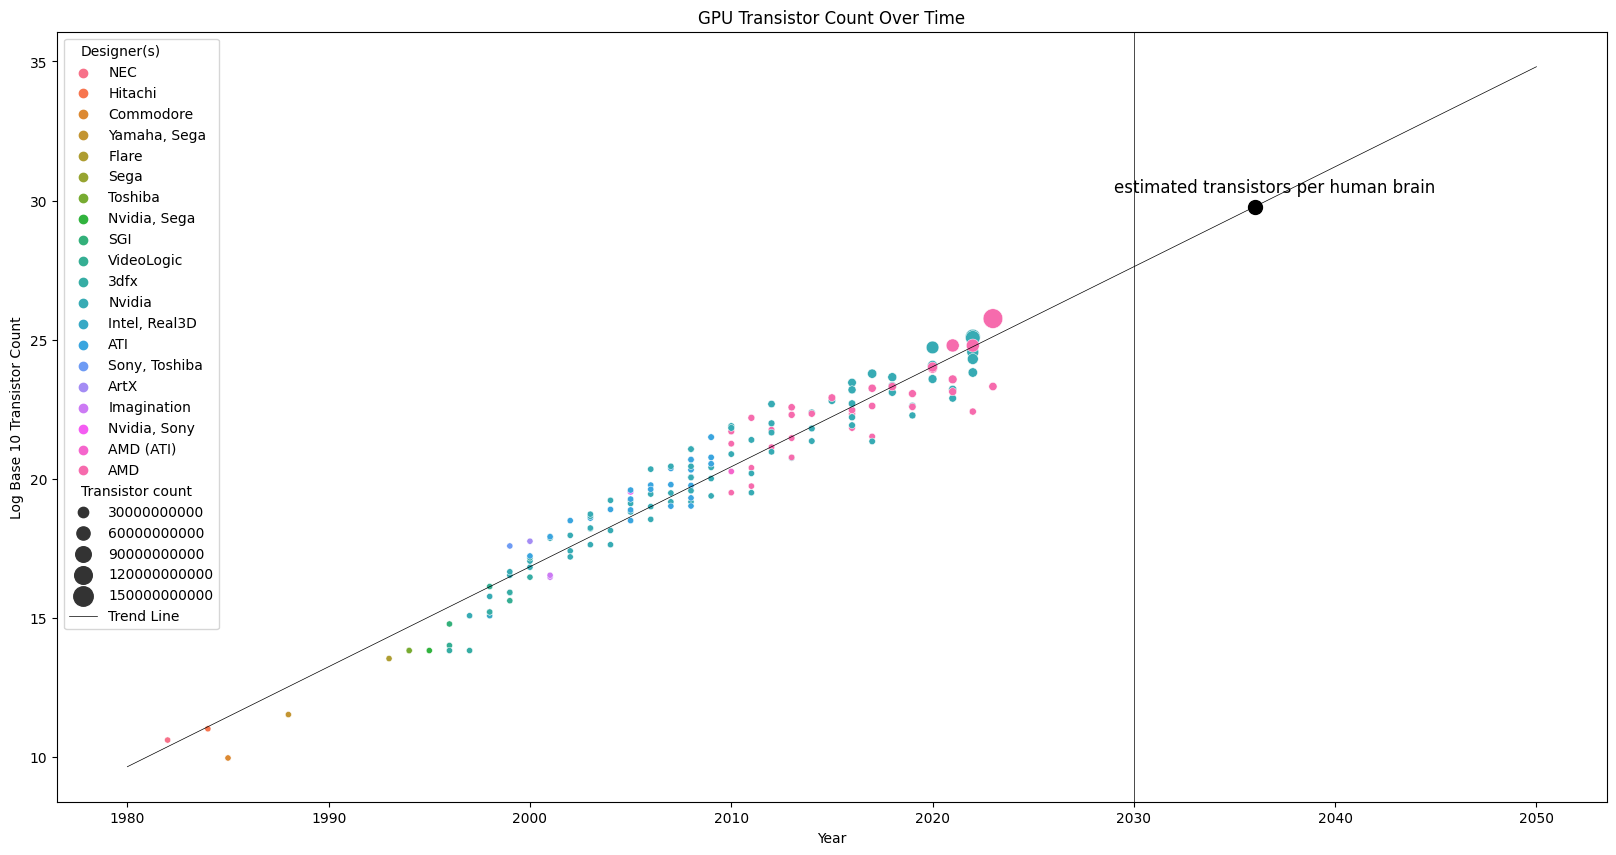

In [72]:
from sklearn.linear_model import LinearRegression
# Fit a linear regression model to the data
model = LinearRegression()
model.fit(gpu_df[['Year']], gpu_df['log_transistor_count'])

# Create a new DataFrame with the years you want to predict
future_years = pd.DataFrame({'Year': np.arange(1980, 2051)})
future_years['log_transistor_count'] = model.predict(future_years[['Year']])

# Plot the data and the trend line
plt.figure(figsize=(20, 10))
plt.title('GPU Transistor Count Over Time')

sns.scatterplot(data=gpu_df, x='Year', y='log_transistor_count', hue='Designer(s)', size='Transistor count', sizes=(20, 200))
sns.lineplot(data=future_years, x='Year', y='log_transistor_count', color='black', label='Trend Line', dashes=True, lw=0.5)

# Add a vertical line at 2030
plt.axvline(x=2030, color='k', linestyle='-', lw=0.5)

# add a dot on 1,000 * 86 billion, where trend line intersects
brain_transistor_count = 1000 * 86e9 / 10
# get the year closest to np.log(brain_transistor_count)
brain_year = future_years.iloc[(future_years['log_transistor_count']-np.log(brain_transistor_count)).abs().argsort()[:1]]
plt.scatter(
    brain_year['Year'],
    np.log(brain_transistor_count), color='k', s=100, label='estimated transistors per human brain'
)
# add text next to the dot
plt.text(
    brain_year['Year'] - 7,
    np.log(brain_transistor_count) + 0.5,
    'estimated transistors per human brain',
    fontsize=12
)


# add x and y labels
plt.xlabel('Year')
plt.ylabel('Log Base 10 Transistor Count')

plt.show()

In [76]:
print('---'*20)
# print the maximum transistor count, log and non-log
print('Max Transistor Count: ', gpu_df['Transistor count'].max())
print('Max Log Transistor Count: ', gpu_df['log_transistor_count'].max())
print('---'*20)
# print for human brain
print('Human Brain Transistor Count: ', brain_transistor_count)
print('Human Brain Log Transistor Count: ', np.log(brain_transistor_count))
print('---'*20)

------------------------------------------------------------
Max Transistor Count:  153000000000
Max Log Transistor Count:  25.753703758338848
------------------------------------------------------------
Human Brain Transistor Count:  8600000000000.0
Human Brain Log Transistor Count:  29.78278331918801
------------------------------------------------------------


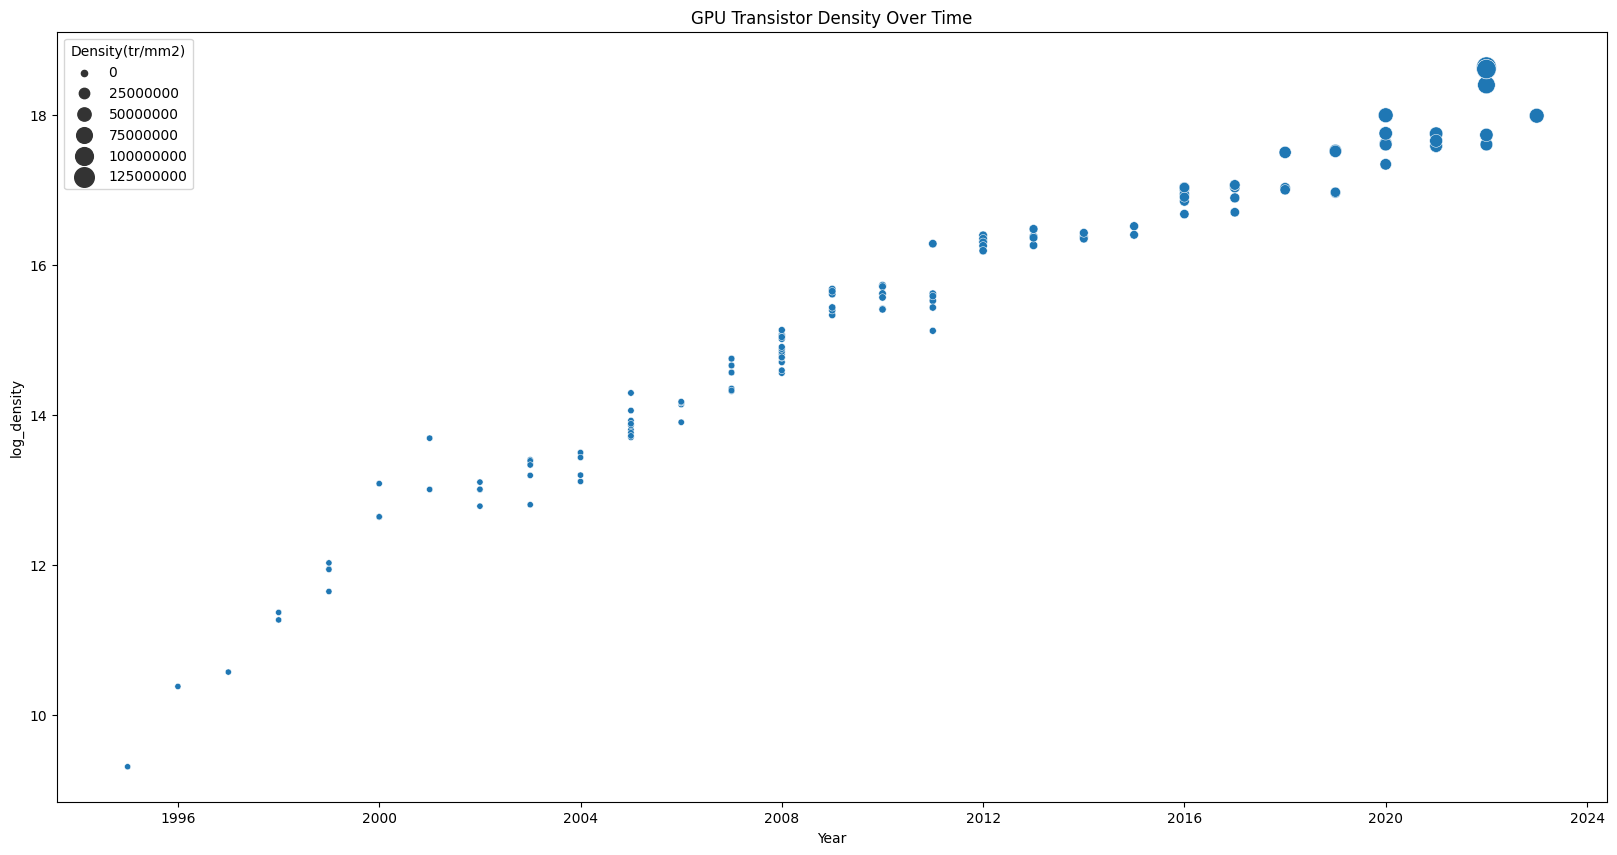

In [104]:
# plot the transistor desity over time
plt.figure(figsize=(20, 10));
plt.title('GPU Transistor Density Over Time');
sns.scatterplot(data=gpu_df, x='Year', y='log_density', size='Density(tr/mm2)', sizes=(20, 200));

### CPUs

In [60]:
cpu_df = cpu_df[cpu_df['Transistor count'] != '?']
cpu_df = cpu_df[cpu_df['Transistor count'] != 'Transistor count']
# convert Year to datetime and convert transistor count to int
cpu_df['Year'] = pd.to_datetime(cpu_df['Year'], format='%Y', errors='coerce')
# remove commas from transistor count
# remove commas from transistor count
cpu_df['Transistor count'] = cpu_df['Transistor count'].str.replace(',', '')
# if it cant be converted to int, drop it
cpu_df = cpu_df[cpu_df['Transistor count'].apply(lambda x: x.isnumeric())]
cpu_df['Transistor count'] = cpu_df['Transistor count'].astype(int)

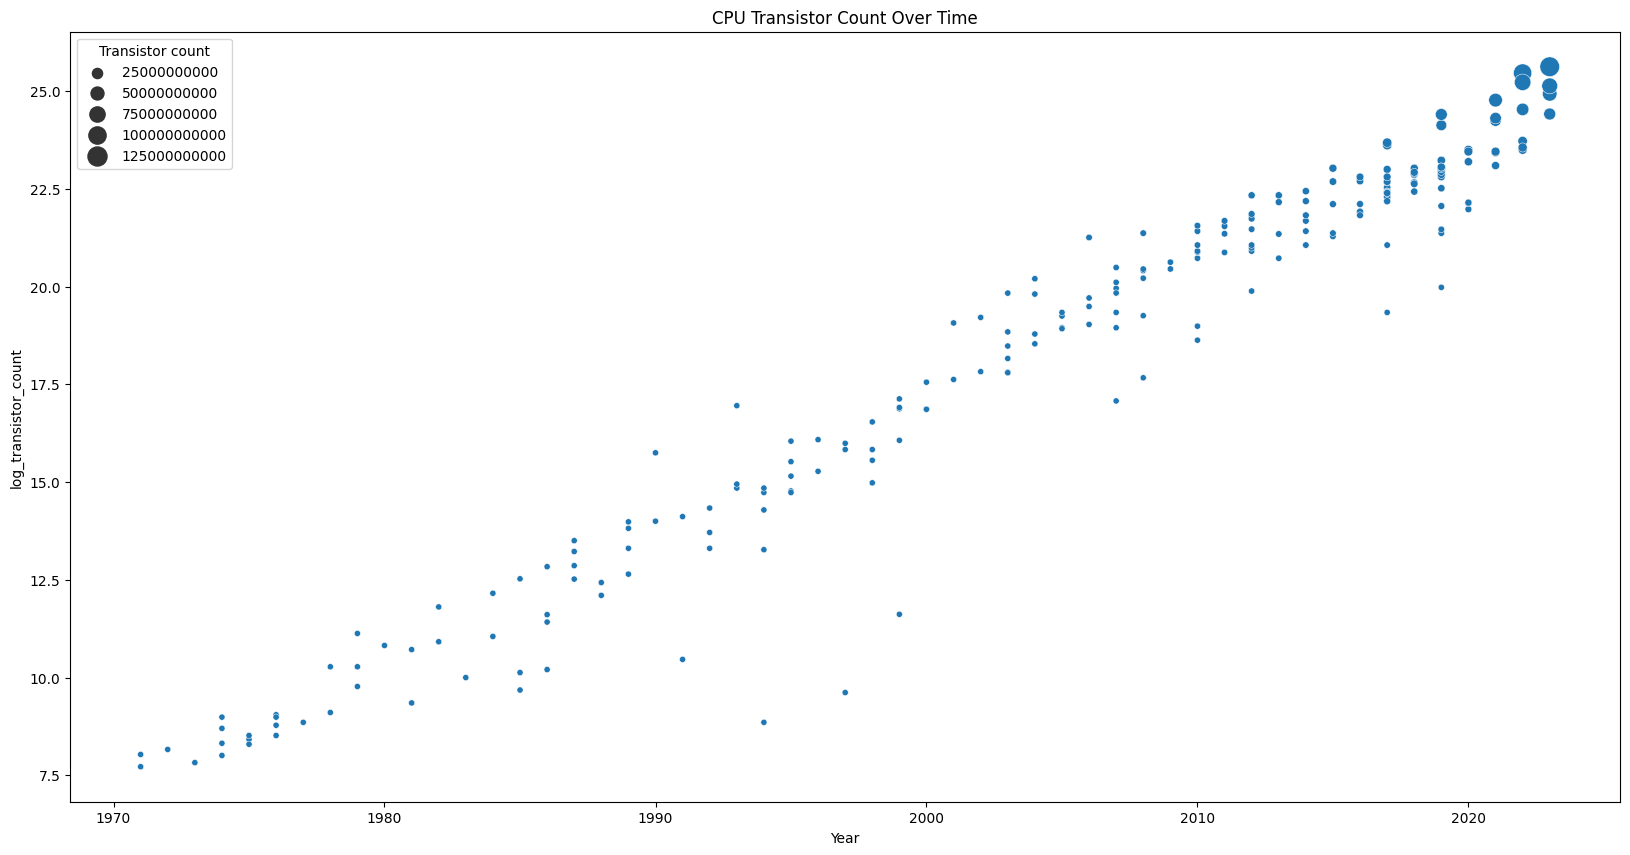

In [65]:
# plot the data
plt.figure(figsize=(20, 10))
plt.title('CPU Transistor Count Over Time')

# add a new column, log_transistor_count
cpu_df['log_transistor_count'] = cpu_df['Transistor count'].apply(lambda x: np.log(x));
sns.scatterplot(data=cpu_df, x='Year', y='log_transistor_count', size='Transistor count', sizes=(20, 200));
plt.show();